# Data Cleaning Using Python Libraries

#### Install / Import Libraries

In [ ]:
# pip install numpy pandas matplotlib seaborn
# uncomment the first line to install 

In [1]:
import pandas as pd

# import the data set (refer to the README file for the Project Structure to understand the file locations)
dataset = pd.read_csv('../data/Titanic-Dataset.csv')
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
# Get a quick overview of the data; 
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
# Determine missing values:
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
# Check how many rows and columns:
dataset.shape

(891, 12)

In [5]:
# Check how many values
dataset.size

10692

### Set Objectives:

#### 1. Handle missing values in the Age, Cabin, and Embarked columns
#### 2. Understand the type of data transformation needed for Name, Age, Sex, and Ticket

### Handle Missing Values

##### Age

#### ! IMPORTANT: Correct erroneous values first before filling in the missing ones (which will depend on the mean of the values)

In [7]:
# (1) Identify Erroneous Values:  
print(dataset['Age'].unique())

[22.   38.   26.   35.     nan 54.    2.   27.   14.    4.   58.   20.
 39.   55.   31.   34.   15.   28.    8.   19.   40.   66.   42.   21.
 18.    3.    7.   49.   29.   65.   28.5   5.   11.   45.   17.   32.
 16.   25.    0.83 30.   33.   23.   24.   46.   59.   71.   37.   47.
 14.5  70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.
 56.   50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.
 60.   10.   64.   13.   48.    0.75 53.   57.   80.   70.   24.5   6.
  0.67 30.5   0.42 34.5  74.  ]


In [8]:
# (2) Filter Erroneous Values:  
# (a) Create the boolean Mask
mask1 = dataset['Age'] < 1.0

In [9]:
# (b) Filter the dataset using 'mask1'
age_error = dataset[mask1]
age_error.head() # the results are values less than 1; it's highly likely that these are results of erroneous data entry.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
469,470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C
644,645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,NaN,C
755,756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,NaN,S


In [10]:
# (3) Correct Erroneous Values: 
# filters the rows that are True and updated them to value * 100 (e.g. 0.83 becomes 83)
dataset.loc[mask1,'Age'] = dataset.loc[mask1,'Age'] * 100

# verify result
dataset['Age'].unique()


array([22. , 38. , 26. , 35. ,  nan, 54. ,  2. , 27. , 14. ,  4. , 58. ,
       20. , 39. , 55. , 31. , 34. , 15. , 28. ,  8. , 19. , 40. , 66. ,
       42. , 21. , 18. ,  3. ,  7. , 49. , 29. , 65. , 28.5,  5. , 11. ,
       45. , 17. , 32. , 16. , 25. , 83. , 30. , 33. , 23. , 24. , 46. ,
       59. , 71. , 37. , 47. , 14.5, 70.5, 32.5, 12. ,  9. , 36.5, 51. ,
       55.5, 40.5, 44. ,  1. , 61. , 56. , 50. , 36. , 45.5, 20.5, 62. ,
       41. , 52. , 63. , 23.5, 92. , 43. , 60. , 10. , 64. , 13. , 48. ,
       75. , 53. , 57. , 80. , 70. , 24.5,  6. , 67. , 30.5, 34.5, 74. ])

In [11]:
# (4) Determine the median age
median_age = dataset['Age'].median()
print(median_age)

28.75


In [12]:
# (5) Determine the mean
mean_age = dataset['Age'].mean()
print(mean_age)

30.415966386554622


#### Which to use, mean() or median()?

In [14]:
# To determine this, let's first get to know the distribution of our data by visualising it:
age_data_titanic = dataset['Age']

# Plotting the distribution using Seaborn
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



<Axes: xlabel='Age', ylabel='Count'>

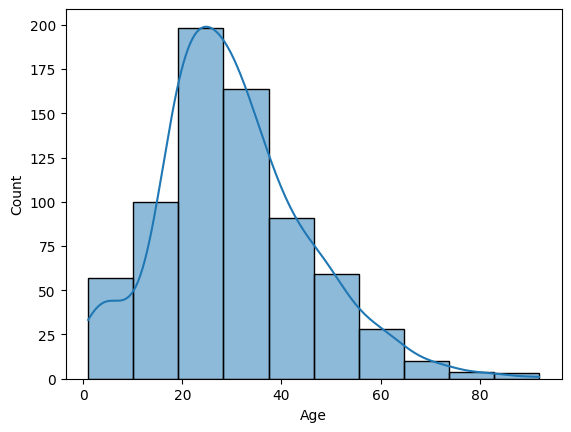

In [17]:
# Using seaborn alone:
sns.histplot(age_data_titanic, bins=10, kde=True) # result to a distribution that is skewed to the right.


## Example of a Skewed Distribution

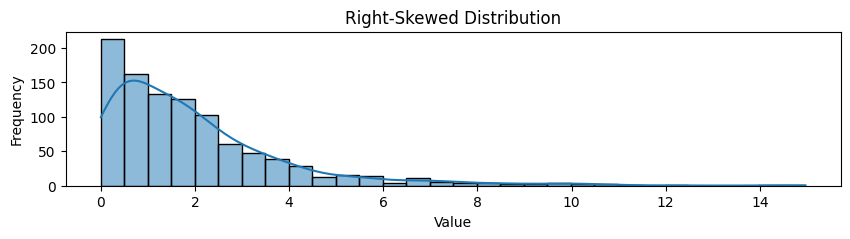

In [101]:
# Generate a right-skewed distribution
data = np.random.exponential(scale=2, size=1000)

# Plotting the distribution using Seaborn
plt.figure(figsize=(10, 2))
sns.histplot(data, bins=30, kde=True)
plt.title('Right-Skewed Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

#### Back to the question: MEAN OR MEDIAN?

In [19]:
# In skewed distributions, the median provides a better central tendency measure. 

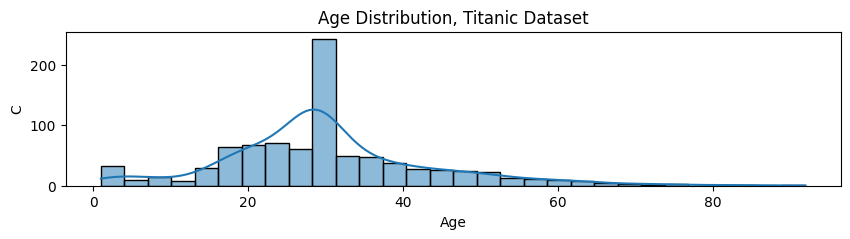

In [103]:
# Let's re-graph the Age Pandas Series with seaborn+numpy

plt.figure(figsize=(10, 2))
sns.histplot(age_data_titanic, bins=30, kde=True)
plt.title('Age Distribution, Titanic Dataset')
plt.xlabel('Age')
plt.ylabel('C')
plt.show()

In [22]:
# (5) Fill in missing values for age using median

# (a) Check how many missing values
# dataset.info() # (891 - 714)
age_missing = pd.isna(dataset['Age'])

# (b) Create a second mask, this time for NaN values
dataset_age_missing = dataset[age_missing]
dataset_age_missing.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q


In [24]:
# (c) Replace the missing values by the median
dataset.loc[age_missing, 'Age'] = median_age
# (d) Verify results (Age)
dataset['Age'].isnull().sum()


np.int64(0)

In [25]:
# (e) Round and convert to int
dataset['Age'] = dataset['Age'].round().astype(int)
# (f) Verify results
dataset['Age'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Age
Non-Null Count  Dtype
--------------  -----
891 non-null    int64
dtypes: int64(1)
memory usage: 7.1 KB


### Back to our objectives:
#### 1. Handle missing values in the Age, Cabin, and Embarked columns
#### 2. Understand the type of data transformation needed for Name, Age, Sex, and Ticket

#### Handle missing values: Cabin

In [33]:
# Seeing as how Cabin has a lot of missing data, let's explore it a bit deeper. 
dataset['Cabin'].isnull().sum() # results to 687 missing values. 

np.int64(687)

In [37]:
# Check for erroneous/irregular values
dataset['Cabin'].str.len().unique() # this counts the number of strings in each value

array([nan,  3.,  4.,  2., 11.,  5.,  7.,  1., 15.])

In [56]:
# Display values greater than 4
cabin_irr_values = dataset['Cabin'].str.len() > 4
cabin_more_than_1 = dataset.loc[cabin_irr_values, 'Cabin']
cabin_more_than_1_df = dataset[cabin_irr_values]
cabin_more_than_1_df 
# Results to a dataset of passengers who occupied more than 1 cabin in the ship. 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19,3,2,19950,263.0000,C23 C25 C27,S
75,76,0,3,"Moen, Mr. Sigurd Hansen",male,25,0,0,348123,7.6500,F G73,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23,3,2,19950,263.0000,C23 C25 C27,S
97,98,1,1,"Greenfield, Mr. William Bertram",male,23,0,1,PC 17759,63.3583,D10 D12,C
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24,0,1,PC 17558,247.5208,B58 B60,C
128,129,1,3,"Peter, Miss. Anna",female,29,1,1,2668,22.3583,F E69,C
297,298,0,1,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.5500,C22 C26,S
299,300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50,0,1,PC 17558,247.5208,B58 B60,C
305,306,1,1,"Allison, Master. Hudson Trevor",male,92,1,2,113781,151.5500,C22 C26,S
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18,2,2,PC 17608,262.3750,B57 B59 B63 B66,C


In [52]:
dataset.iloc[70:100,:]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
70,71,0,2,"Jenkin, Mr. Stephen Curnow",male,32,0,0,C.A. 33111,10.5000,NaN,S
71,72,0,3,"Goodwin, Miss. Lillian Amy",female,16,5,2,CA 2144,46.9000,NaN,S
72,73,0,2,"Hood, Mr. Ambrose Jr",male,21,0,0,S.O.C. 14879,73.5000,NaN,S
73,74,0,3,"Chronopoulos, Mr. Apostolos",male,26,1,0,2680,14.4542,NaN,C
74,75,1,3,"Bing, Mr. Lee",male,32,0,0,1601,56.4958,NaN,S
75,76,0,3,"Moen, Mr. Sigurd Hansen",male,25,0,0,348123,7.6500,F G73,S
76,77,0,3,"Staneff, Mr. Ivan",male,29,0,0,349208,7.8958,NaN,S
77,78,0,3,"Moutal, Mr. Rahamin Haim",male,29,0,0,374746,8.0500,NaN,S
78,79,1,2,"Caldwell, Master. Alden Gates",male,83,0,2,248738,29.0000,NaN,S
79,80,1,3,"Dowdell, Miss. Elizabeth",female,30,0,0,364516,12.4750,NaN,S


## Feature Engineering

In [94]:
# Sample DataFrame
sample = {
    'Houses': ['C85', 'C123', 'E46', None, 'B57 B59 B63', 'D']
}
sample_df = pd.DataFrame(sample)
house_split = sample_df['Houses'].str.split() 
# returns a LIST of substrings. 
# By default, split() splits the string at any whitespace and returns a list of substrings.
house_split.head()

len(house_split[4])

0              [C85]
1             [C123]
2              [E46]
3               None
4    [B57, B59, B63]
Name: Houses, dtype: object

In [109]:
# Let's add a column that counts the number of occupied cabins per passenger

cabins_expanded = dataset['Cabin'].str.split()
cabins_expanded


891